In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from numpy import cumsum
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import json
import pmdarima as pm

To earn $1000 in dividends from T, yield 0.0757 you need to purchase 893.17 shares. current price*shares 14.79=13210.04

To earn $1000 in dividends from IRM, yield 0.0437 you need to purchase 389.24 shares. current price*shares 58.79=22883.30

To earn $1000 in dividends from F, yield 0.0478 you need to purchase 1710.59 shares. current price*shares 12.23=20920.50

To earn $1000 in dividends from BHP, yield 0.0598 you need to purchase 300.93 shares. current price*shares 55.57=16722.41

To earn $1000 in dividends from JNJ, yield 0.0307 you need to purchase 210.23 shares. current price*shares 154.94=32573.29

To earn $1000 in dividends from KO, yield 0.032899998 you need to purchase 548.40 shares. current price*shares 55.42=11652.09



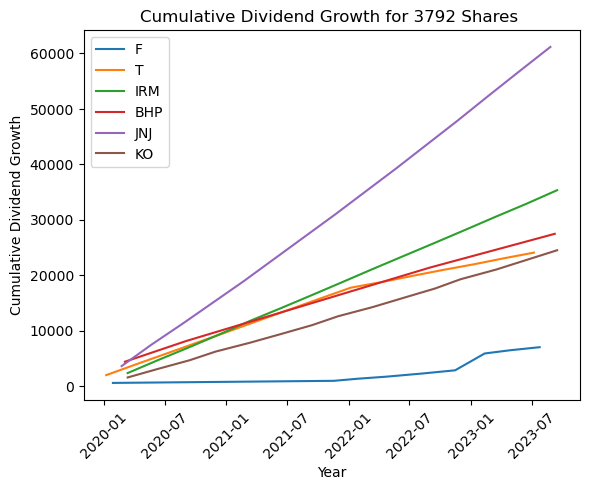

In [14]:
earnings=1000
def plotARIMA(df,order,start,label):
    model=ARIMA(df, order=order)
    results=model.fit()
    forecast=results.get_prediction(start=start)
    mean_forecast=forecast.predicted_mean
    confidence_intervals=forecast.conf_int()
    lower_limit = confidence_intervals['lower '+label]
    upper_limit = confidence_intervals['upper '+label]
    plt.plot(df.index,df,color='green',label='NEE')
    plt.plot(mean_forecast.index, mean_forecast.values, color='red',label='forecast')
    plt.fill_between(lower_limit.index,lower_limit, upper_limit, color='pink')
    plt.xticks(rotation=45)
    plt.show()

def getDividend_Per_Share(symbol,earnings):
    # Get the stock data from Yahoo Finance
    stock_data = yf.Ticker(symbol)
    # Get the current stock price and dividend yield
    current_price = stock_data.info['regularMarketDayHigh']
    dividend_yield = stock_data.info['dividendYield']
    # Calculate the dividend per share
    dividend_per_share = current_price * dividend_yield 
    # Calculate the number of shares required to earn $1000 in dividends
    shares_required = earnings / dividend_per_share
    return stock_data,current_price,dividend_yield,dividend_per_share,shares_required

t_symbol='T'
irm_symbol='IRM'
f_symbol='F'
bhp_symbol='BHP'
jnj_symbol='JNJ'
ko_symbol='KO'
t_stock_data,t_current_price,t_dividend_yield,t_dividend_per_share,t_shares_required=getDividend_Per_Share(t_symbol,earnings)
irm_stock_data,irm_current_price,irm_dividend_yield,irm_dividend_per_share,irm_shares_required=getDividend_Per_Share(irm_symbol,earnings)
f_stock_data,f_current_price,f_dividend_yield,f_dividend_per_share,f_shares_required=getDividend_Per_Share(f_symbol,earnings)
bhp_stock_data,bhp_current_price,bhp_dividend_yield,bhp_dividend_per_share,bhp_shares_required=getDividend_Per_Share(bhp_symbol,earnings)
jnj_stock_data,jnj_current_price,jnj_dividend_yield,jnj_dividend_per_share,jnj_shares_required=getDividend_Per_Share(jnj_symbol,earnings)
ko_stock_data,ko_current_price,ko_dividend_yield,ko_dividend_per_share,ko_shares_required=getDividend_Per_Share(ko_symbol,earnings)
# Print the result
print(f"To earn ${earnings} in dividends from {t_symbol}, yield {t_dividend_yield} you need to purchase {t_shares_required:.2f} shares. current price*shares {t_current_price:.2f}={t_current_price*t_shares_required:.2f}\n")
print(f"To earn ${earnings} in dividends from {irm_symbol}, yield {irm_dividend_yield} you need to purchase {irm_shares_required:.2f} shares. current price*shares {irm_current_price:.2f}={irm_current_price*irm_shares_required:.2f}\n")
print(f"To earn ${earnings} in dividends from {f_symbol}, yield {f_dividend_yield} you need to purchase {f_shares_required:.2f} shares. current price*shares {f_current_price:.2f}={f_current_price*f_shares_required:.2f}\n")
print(f"To earn ${earnings} in dividends from {bhp_symbol}, yield {bhp_dividend_yield} you need to purchase {bhp_shares_required:.2f} shares. current price*shares {bhp_current_price:.2f}={bhp_current_price*bhp_shares_required:.2f}\n")
print(f"To earn ${earnings} in dividends from {jnj_symbol}, yield {jnj_dividend_yield} you need to purchase {jnj_shares_required:.2f} shares. current price*shares {jnj_current_price:.2f}={jnj_current_price*jnj_shares_required:.2f}\n")
print(f"To earn ${earnings} in dividends from {ko_symbol}, yield {ko_dividend_yield} you need to purchase {ko_shares_required:.2f} shares. current price*shares {ko_current_price:.2f}={ko_current_price*jnj_shares_required:.2f}\n")

shares=3792

def getCumulative(stock_data):
    dividend_data = stock_data.dividends
    dividend_data = dividend_data.loc['2020':'2024']
    cumulative_dividend = (dividend_data * shares).cumsum()
    #print(cumulative_dividend)
    return cumulative_dividend

f_cumulative_dividend=getCumulative(f_stock_data)
t_cumulative_dividend=getCumulative(t_stock_data)
irm_cumulative_dividend=getCumulative(irm_stock_data)
bhp_cumulative_dividend=getCumulative(bhp_stock_data)
jnj_cumulative_dividend=getCumulative(jnj_stock_data)
ko_cumulative_dividend=getCumulative(ko_stock_data)


# Plot the cumulative dividend growth
plt.plot(f_cumulative_dividend.index, f_cumulative_dividend,label="F")
plt.plot(t_cumulative_dividend.index, t_cumulative_dividend,label="T")
plt.plot(irm_cumulative_dividend.index, irm_cumulative_dividend,label="IRM")
plt.plot(bhp_cumulative_dividend.index, bhp_cumulative_dividend,label="BHP")
plt.plot(jnj_cumulative_dividend.index, jnj_cumulative_dividend,label="JNJ")
plt.plot(ko_cumulative_dividend.index, ko_cumulative_dividend,label="KO")
plt.title(f'Cumulative Dividend Growth for {shares} Shares ')
plt.xlabel('Year')
plt.ylabel('Cumulative Dividend Growth')
plt.xticks(rotation=45)
plt.legend()
plt.show()

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


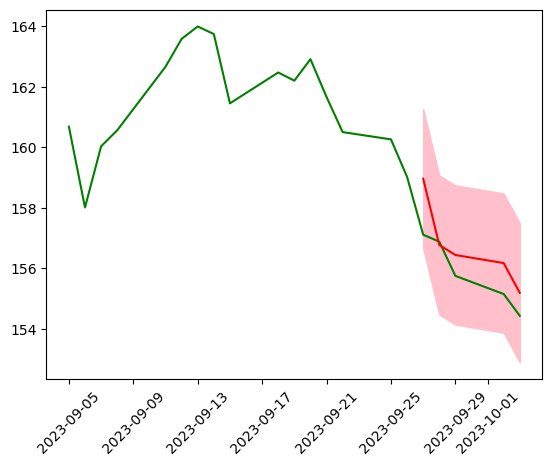

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   21
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -34.359
Date:                Tue, 03 Oct 2023   AIC                             80.717
Time:                        10:14:54   BIC                             86.985
Sample:                    09-05-2023   HQIC                            82.078
                         - 10-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.5204      3.019     52.838      0.000     153.603     165.438
ar.L1          0.8024      0.636      1.261      0.207      -0.445       2.050
ar.L2          0.4976      0.520      0.957      0.3

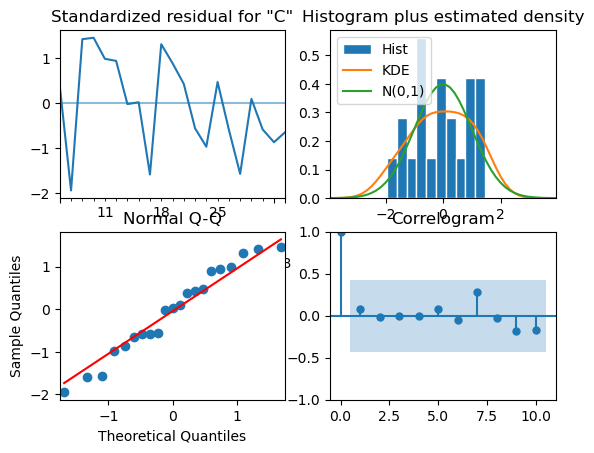

In [3]:
jnj_df = jnj_stock_data.history()
plotARIMA(jnj_df["Close"].sort_index(), (3,0,1),-5,"Close")
model=ARIMA(jnj_df["Close"].sort_index(), order=(3,0,1))
results=model.fit()

results.plot_diagnostics()

print(results.summary())

print("Price:")
print("not a normal distribution")


C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


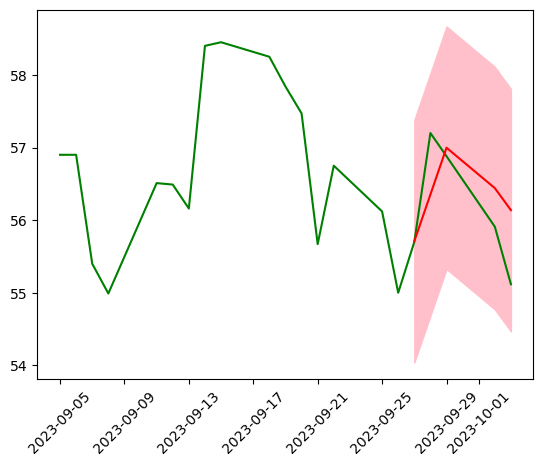

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   21
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -26.712
Date:                Tue, 03 Oct 2023   AIC                             65.423
Time:                        10:14:55   BIC                             71.690
Sample:                    09-05-2023   HQIC                            66.783
                         - 10-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.5185      0.472    119.865      0.000      55.594      57.443
ar.L1          0.3938      1.873      0.210      0.833      -3.277       4.064
ar.L2         -0.1343      1.276     -0.105      0.9

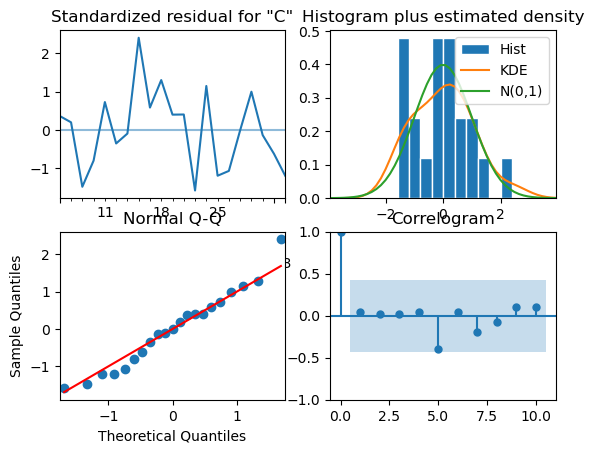

In [4]:
bhp_df = bhp_stock_data.history()
plotARIMA(bhp_df["Close"].sort_index(), (3,0,1),-5,"Close")
model=ARIMA(bhp_df["Close"].sort_index(), order=(3,0,1))
results=model.fit()

results.plot_diagnostics()

print(results.summary())

print("Price:")
print("not correlated")
print( "not normally distributed")




In [5]:
model=ARIMA(bhp_df["Dividends"].sort_index(), order=(3,0,1))
results=model.fit()

print(results.summary())

print("Dividend:")
print(" not correlated")
print( "normally distributed")

                               SARIMAX Results                                
Dep. Variable:              Dividends   No. Observations:                   21
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  -6.699
Date:                Tue, 03 Oct 2023   AIC                             25.398
Time:                        10:14:56   BIC                             31.666
Sample:                    09-05-2023   HQIC                            26.759
                         - 10-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0597      0.241      0.248      0.804      -0.413       0.532
ar.L1          0.8336      9.748      0.086      0.932     -18.273      19.940
ar.L2         -0.0102     17.714     -0.001      1.0

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


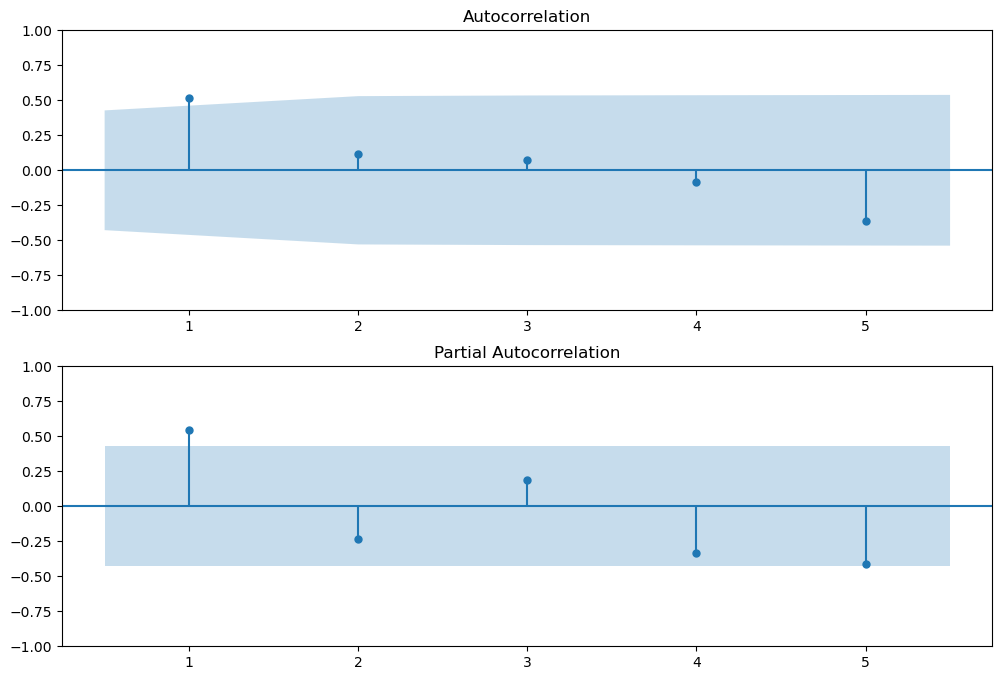

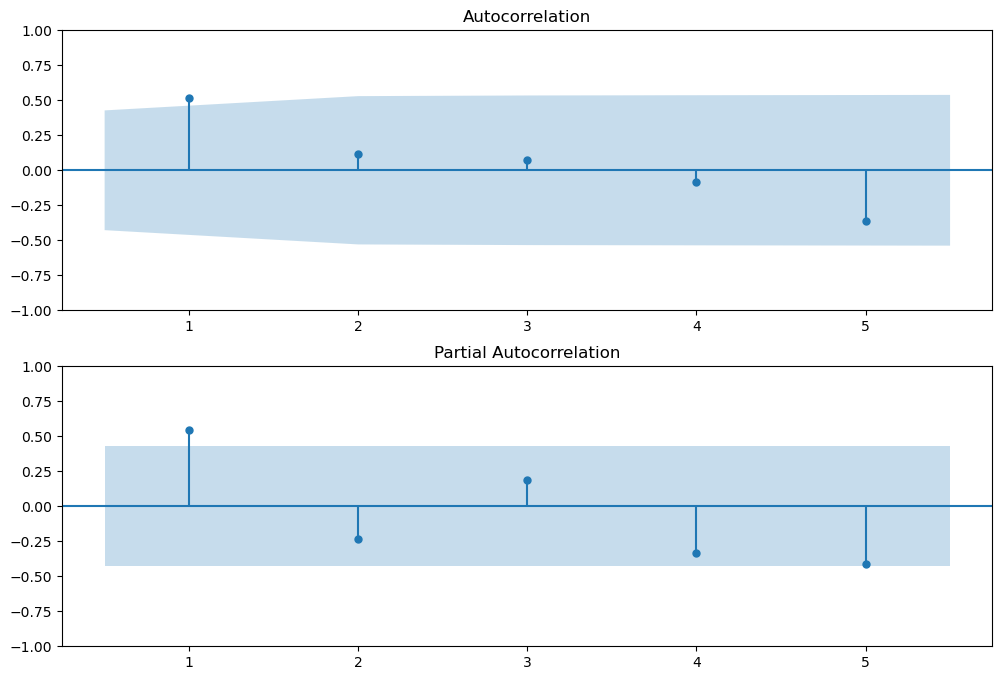

In [6]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(bhp_df["Close"], lags=5, zero=False, ax=ax1)
plot_pacf(bhp_df["Close"], lags=5, zero=False, ax=ax2)

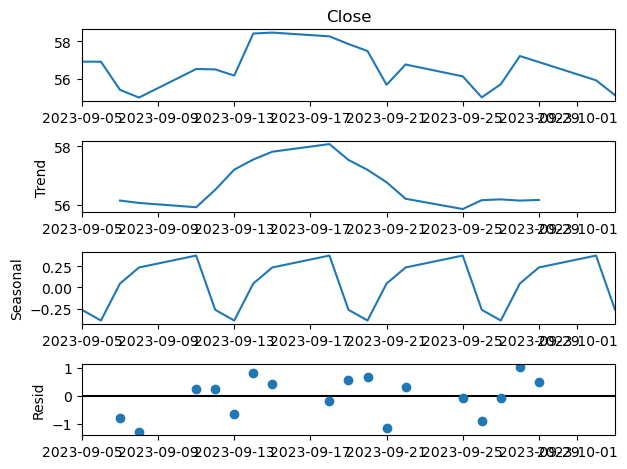

In [7]:
# Perform additive decomposition
decomp = seasonal_decompose(bhp_df["Close"], period=5)

# Plot decomposition
decomp.plot()
plt.show()

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


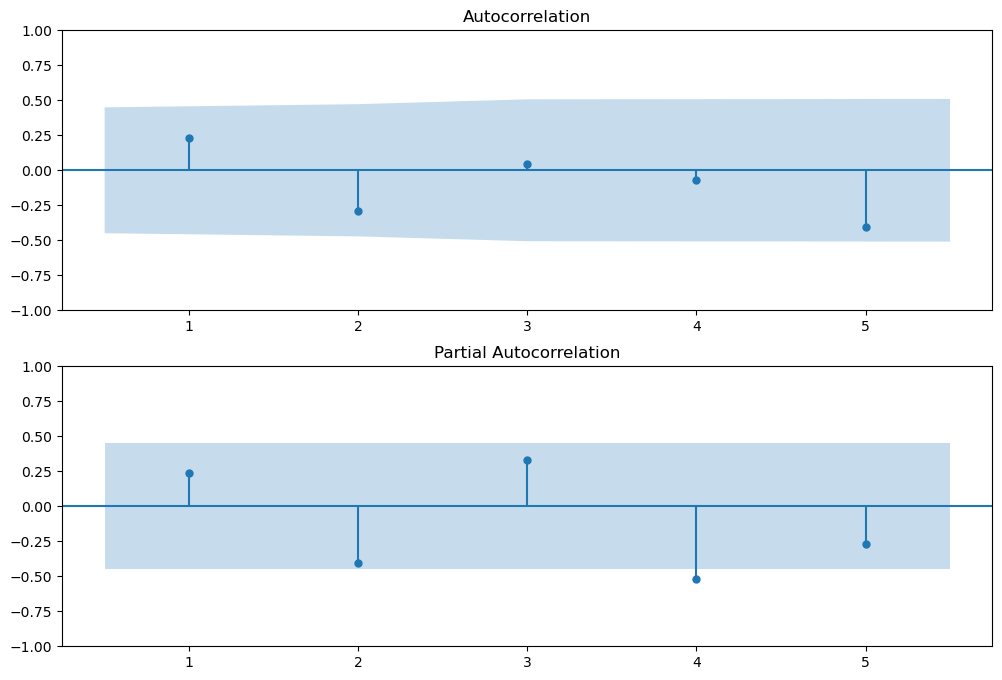

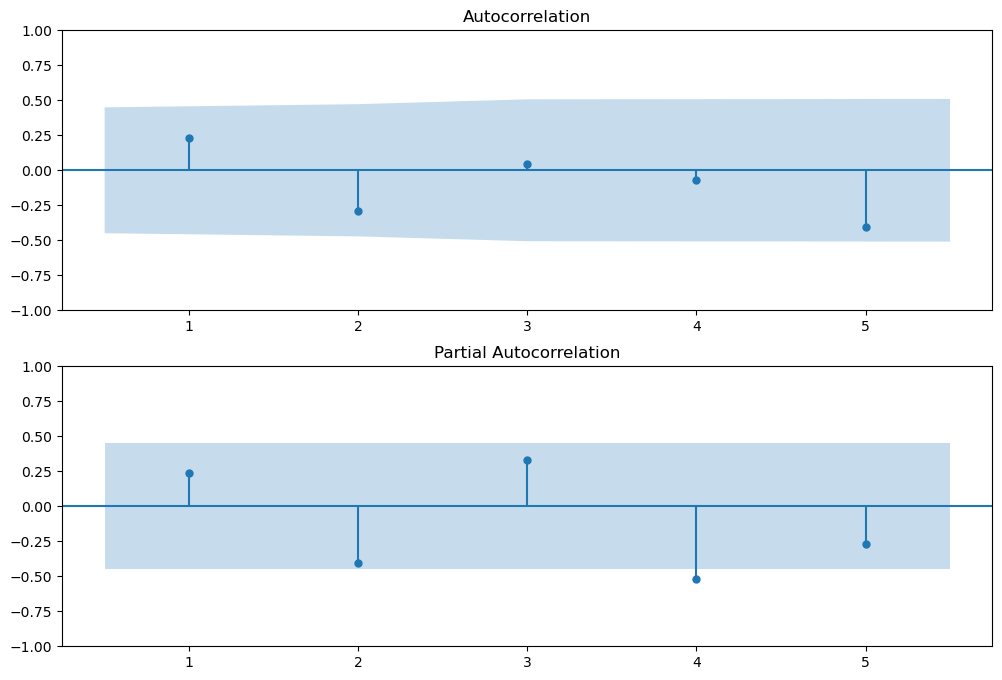

In [8]:
N=3
df=bhp_df["Close"]-bhp_df["Close"].rolling(N).mean()
df=df.dropna()

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(df, lags=5, zero=False, ax=ax1)
plot_pacf(df, lags=5, zero=False, ax=ax2)

In [9]:
bhp_df = bhp_stock_data.history()
#plotARIMA(bhp_df["Close"].sort_index(), (3,0,1),-5,"Close")
#results=model.fit()

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 10 must be < 10.

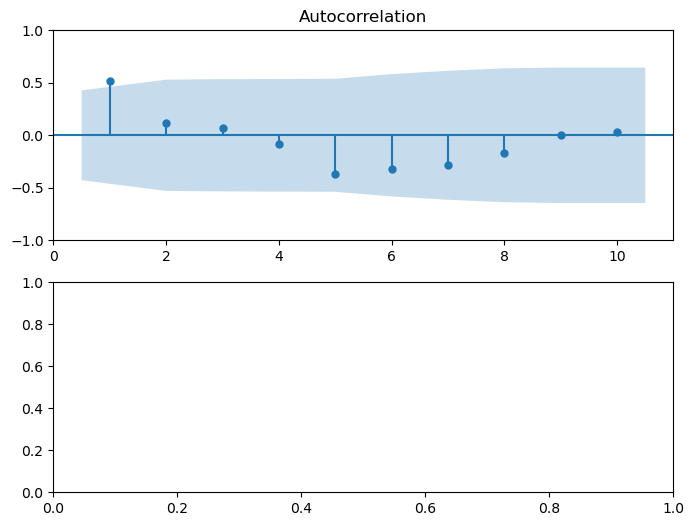

In [10]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(bhp_df["Close"],zero=False,lags=10,ax=ax1)

# Plot the PACF on ax2
plot_pacf(bhp_df["Close"],zero=False,lags=10,ax=ax2)

print("acf drop off at 5, pacf drop off at 4")



In [ ]:
bhp_df_diff=bhp_df["Close"].diff(10).diff().dropna()

bhp_df_diff.plot()
plt.show()

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(bhp_df_diff,zero=False,lags=5,ax=ax1)

# Plot the PACF on ax2
plot_pacf(bhp_df_diff,zero=False,lags=5,ax=ax2)

print("acf repeats at 2, pacf repeats at 3")

In [ ]:
bhp_data=bhp_df["Close"].sort_index()
#data=bhp_df_diff
dates=bhp_data.index
#model=SARIMAX(bhp_data, order=(5,0,4),seasonal_order=(0,0,0,5))
model=SARIMAX(bhp_data, order=(0,0,1),seasonal_order=(0,0,0,5))
sarima_results=model.fit()
sarima_pred=sarima_results.get_prediction(start=-1)

# Create ARIMA mean forecast
#arima_pred = arima_results.get_forecast(steps=5)
#arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=5)
sarima_mean = sarima_pred.predicted_mean

forecast_dict = {
    'predicted_mean':sarima_pred.predicted_mean.tolist(),
    'se_mean': sarima_pred.se_mean.tolist(),
    #'conf_int': sarima_pred.conf_int()
}

print(json.dumps(forecast_dict))

# Plot mean ARIMA and SARIMA predictions and observed
#plt.plot(dates,sarima_mean, label='SARIMA')
#plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(bhp_data, label='observed')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.plot(sarima_pred.se_mean.index,sarima_pred.se_mean.tolist(), label='SARIMA')


In [ ]:
results=pm.auto_arima(bhp_data,error_action='ignore')
print(results.summary())
results.plot_diagnostics()